In [5]:
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Portfolio import Portfolio
from Treasury import Treasury
import pandas as pd

Max sharpe ratio: -1.2417494172775918
Max sharpe ratio portfolio annualized log return: 1.748210992746437
Max sharpe ratio portfolio annualized volatility of log returns: 0.03641133643517677
Max sharpe ratio portfolio weights: [ 0.06322294 -0.20860614 -0.03804483  0.0009206  -0.00265863  0.01500865
  0.28053179  0.00526548  0.5         0.5         0.06918311 -0.18482295]

                                GLD            SPY            XLE  \
                     GLD Log Return SPY Log Return XLE Log Return   
GLD  GLD Log Return        0.032878       0.001145       0.007585   
SPY  SPY Log Return        0.001145       0.043159       0.053728   
XLE  XLE Log Return        0.007585       0.053728       0.101861   
XLY  XLY Log Return       -0.000683       0.042793       0.049563   
CL1  CL1 Log Return        0.015184       0.031422       0.076466   
GC1  GC1 Log Return        0.028757       0.000475       0.005967   
ES1  ES1 Log Return        0.001080       0.042830       0.053841   
NG1 

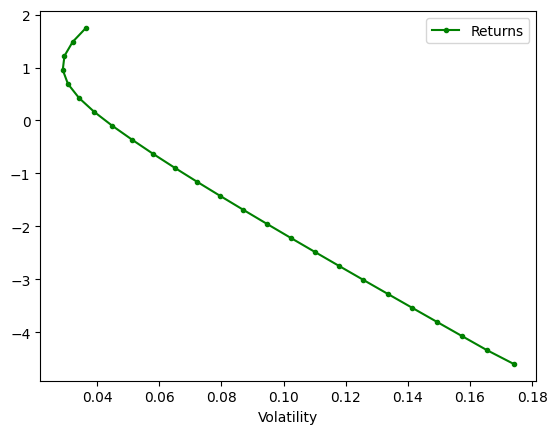

In [19]:
def get_risk_free_rate(dateString):
    df = pd.read_csv("../Data/TreasuryData/Cleaned-Data/cleaned_treasury_data.csv")
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    halfYear = df["1 Mo"].to_frame()
    rf = halfYear.loc[dateString, '1 Mo']
    return rf


etfBND = ETF("BND")
etfDBC = ETF("DBC")
etfGLD = ETF("GLD")
etfQQQ = ETF("QQQ")
etfSPY = ETF("SPY")
etfXLB = ETF("XLB")
etfXLE = ETF("XLE")
etfXLF = ETF("XLF")
etfXLI = ETF("XLI")
etfXLK = ETF("XLK")
etfXLP = ETF("XLP")
etfXLU = ETF("XLU")
etfXLV = ETF("XLV")
etfXLY = ETF("XLY")
futureCL1 = Future("CL1")
futureDX1 = Future("DX1")
futureES1 = Future("ES1")
futureFF1 = Future("FF1")
# Skipped FF4
futureGC1 = Future("GC1")
futureNG1 = Future("NG1")
futureSI1 = Future("SI1")
treasurySixMonth = Treasury("0.5")
treasuryOneYear = Treasury("1.0")
treasuryTwoYear = Treasury("2.0")
treasuryThreeYear = Treasury("3.0")
treasuryFiveYear = Treasury("5.0")
treasurySevenYear = Treasury("7.0")
treasuryTenYear = Treasury("10.0")
treasuryThirtyYear = Treasury("30.0")
all_assets = [
    etfBND, etfDBC, etfGLD, etfQQQ, etfSPY, etfXLB, etfXLE, etfXLF, etfXLI,
    etfXLK, etfXLP, etfXLU, etfXLV, etfXLY,
    futureCL1, futureDX1, futureES1, futureFF1, futureGC1, futureNG1, futureSI1,
    treasurySixMonth, treasuryOneYear, treasuryTwoYear, treasuryThreeYear,
    treasuryFiveYear, treasurySevenYear, treasuryTenYear, treasuryThirtyYear
]
subset = [
    etfGLD, etfSPY, etfXLE, etfXLY,
    futureCL1, futureGC1, futureES1, futureNG1, treasuryTwoYear,
    treasuryFiveYear, treasuryTenYear, treasuryThirtyYear
]

portfolio1 = Portfolio(subset, rf=get_risk_free_rate("2007-04-11"), equity_benchmark=etfSPY, future_benchmark=etfDBC, treasury_benchmark=treasurySixMonth)
portfolio1.plot_ef(n_points=25)
max_sharpe_ratio, ret, vol, weights = portfolio1.max_sharpe_portfolio(n_points=5)
print("Max sharpe ratio: " + str(max_sharpe_ratio))
print("Max sharpe ratio portfolio annualized log return: " + str(ret))
print("Max sharpe ratio portfolio annualized volatility of log returns: " + str(vol))
print("Max sharpe ratio portfolio weights: " + str(weights))
print()
print(portfolio1.annualized_covariance_matrix())
print()
print(portfolio1.annualized_portfolio_vol(weights))



In [16]:
print(portfolio1.asset_log_returns_df)

                      BND            DBC            GLD            QQQ  \
           BND Log Return DBC Log Return GLD Log Return QQQ Log Return   
2007-04-11      -0.002662      -0.001573      -0.001192      -0.010575   
2007-04-12      -0.000133       0.005886      -0.001343       0.007886   
2007-04-13      -0.001602       0.005462       0.012609       0.002018   
2007-04-16       0.000935      -0.007813       0.008221       0.009140   
2007-04-17       0.002531      -0.010248      -0.005865       0.002216   
...                   ...            ...            ...            ...   
2020-12-23      -0.001126       0.012440       0.006626      -0.005049   
2020-12-24       0.001706       0.002743       0.003977       0.004403   
2020-12-28      -0.000341      -0.006183      -0.003636       0.010029   
2020-12-29       0.000341       0.002753       0.003636       0.000895   
2020-12-30       0.000681       0.006167       0.007626       0.000032   

                      SPY            